# HM1: Logistic Regression.

### Name: [Your-Name]


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [3]:
# Load Packages
%pip install numpy
%pip install pandas
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split





## 1.2 Examine and clean data

In [5]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
df = pd.read_csv('data.csv')
df['diagnosis'] = df['diagnosis'].replace('B', 1)
df['diagnosis'] = df['diagnosis'].replace('M', -1)
del df['id']
del df['Unnamed: 32']
df  



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [6]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]], df['diagnosis'], test_size=0.2, random_state=0)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

## 1.4. Feature scaling

Use the standardization to transform both training and test features

In [7]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

# concatenate a column of 1s to the training features
x_train = numpy.concatenate((x_train, numpy.ones((x_train.shape[
    0], 1))), axis=1)

# concatenate a column of 1s to the test features
x_test = numpy.concatenate((x_test, numpy.ones((x_test.shape[
    0], 1))), axis=1)


test mean = 
[ 0.02090745  0.16431943  0.03098111  0.01492717 -0.01921133  0.10117201
  0.08443932  0.02966041  0.04062134  0.09494587  0.04653776  0.06428674
  0.10007498  0.00538732  0.06601984  0.11839521  0.0676146   0.1268942
  0.01037956  0.16193656  0.01337734  0.1134187   0.03390329 -0.00517026
 -0.02001553  0.07842781  0.11756424  0.01212816 -0.02700714  0.12744666]
test std = 
[0.98484027 1.15221324 0.99783436 0.91061412 1.0932457  1.2099472
 1.1161288  1.0269985  1.00338544 1.16387855 0.86929628 1.0858163
 0.95737985 0.73797557 1.25342805 1.10484161 0.84117872 1.20913453
 1.04276269 1.05856313 0.94112163 1.03290181 0.96071251 0.84629366
 1.04566915 1.12995399 1.20449902 1.03206998 0.90827971 1.06240744]


In [8]:
print(x_train.shape)

(455, 31)


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [9]:
w = np.random.rand(30,)

In [10]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    n = x.shape[0]
    objective = 0
    
    for i in range(n):
        objective += np.log(1 + np.exp(np.dot(-np.dot(y[i], np.transpose(x[i,:])), w)))
    
    objective /= n
    objective += (lam/2) * np.linalg.norm(w)**2
    
    return objective



# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [11]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n = x.shape[0]
    d = x.shape[1]
    gradient = 0

    for i in range(n):
        gradient += (np.dot(y[i], x[i,:]))/(1 + np.exp(np.dot(np.dot(y[i], np.transpose(x[i,:])), w)))
    
    gradient *= (-1/n)
    gradient = gradient.reshape(d,1)
    gradient += lam * w
    
    return gradient



In [12]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    objv = np.zeros(max_epoch)
    n = x.shape[0]

    for epoch in range(max_epoch):
        g = gradient(w,x,y,lam)
        w = w - learning_rate*g
        objv[epoch] = objective(w,x,y,lam)
    
    return w, objv




Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [13]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
# w = np.random.rand(31,1)
w = np.zeros((31, 1))
w, obj_vals = gradient_descent(x_train, y_train, 0.0, .01, w, 1000)


In [14]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.random.rand(31,1)
w, obj_vals = gradient_descent(x_train, y_train, .05, .01, w, 1000)

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [15]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    objective = np.log(1 + np.exp(-yi * xi.T @ w)) + (lam/2) * np.linalg.norm(w)**2
    
    d = xi.shape[0]

    numerator = yi * xi
    denominator = 1 + np.exp(yi * xi.T @ w)
    grad = numerator / denominator
    grad *= -1
    grad += (lam * w).reshape((d,))

    return objective, grad




Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [16]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n = x.shape[0]
    objvals = np.zeros(max_epoch)
    print()

    for epoch in range(max_epoch):
        ind = np.random.permutation(n)
        avg_obj = 0

        for i in ind:
            o, g = stochastic_objective_gradient(w, x[i], y[i], lam)
            w -= (learning_rate * g)
            avg_obj += o

        objvals[epoch] = avg_obj / n

    return w, objvals


Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [17]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.random.rand(31,)
w, obj_vals = sgd(x_train, y_train, 0, .05, w, 100)
obj_vals


array([0.33694818, 0.08422584, 0.07390386, 0.06886077, 0.06530684,
       0.06415519, 0.06190099, 0.0612671 , 0.06007526, 0.0588768 ,
       0.05827734, 0.05751534, 0.05662927, 0.05679791, 0.05516771,
       0.05657651, 0.05537064, 0.05592295, 0.05503373, 0.05429777,
       0.05452997, 0.05402134, 0.05315746, 0.05352078, 0.05300224,
       0.05247303, 0.05209278, 0.05249264, 0.05235298, 0.05131033,
       0.05244401, 0.0513103 , 0.05119674, 0.05075331, 0.05082736,
       0.05023289, 0.05102979, 0.05026819, 0.0493973 , 0.04985517,
       0.05011053, 0.04969121, 0.04961308, 0.04992825, 0.04941379,
       0.0493128 , 0.04867497, 0.04872797, 0.04930109, 0.04882245,
       0.0484662 , 0.04843091, 0.04894157, 0.04765969, 0.04836404,
       0.04832286, 0.0481309 , 0.04912111, 0.04804676, 0.04766538,
       0.04707493, 0.04803423, 0.04678783, 0.04697895, 0.04710782,
       0.04682996, 0.04686649, 0.04738822, 0.04651096, 0.04652241,
       0.04660632, 0.04615193, 0.04672297, 0.04636519, 0.04570

In [18]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.random.rand(31,)
w, obj_vals = sgd(x_train, y_train, .05, .05, w, 100)
print(obj_vals)



[0.38029349 0.17269523 0.17305095 0.17269614 0.17334931 0.17319629
 0.17044546 0.17846374 0.17229202 0.17190153 0.17237771 0.17251112
 0.17266379 0.17151534 0.17098128 0.17334607 0.17185932 0.17186228
 0.169102   0.1733332  0.17069251 0.17144171 0.17432316 0.17063789
 0.17191938 0.17393521 0.17165416 0.17397659 0.17145008 0.17187606
 0.17306446 0.17148871 0.17331715 0.16986416 0.16896565 0.1725156
 0.17199664 0.17071453 0.172571   0.1726442  0.17284729 0.17368309
 0.17228215 0.17174609 0.17240688 0.17099464 0.17120941 0.17353478
 0.17170724 0.17106771 0.17362304 0.17364456 0.17369473 0.17207446
 0.17337218 0.17269261 0.17064695 0.17089524 0.17346482 0.17170963
 0.17184879 0.17188733 0.17223654 0.17153293 0.17049207 0.17183193
 0.17263751 0.17172628 0.17327808 0.17117725 0.1718113  0.17280886
 0.17209721 0.17277617 0.17127064 0.17213299 0.17205797 0.17318613
 0.17301816 0.17275236 0.17320571 0.17096422 0.1728436  0.17069638
 0.17242333 0.17144386 0.17105756 0.17089387 0.17270879 0.1718

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [19]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    b = xi.shape[0]
    objective = 0
    grad = np.zeros(31,)

    for i in range(b):
        objective += np.log(1 + np.exp(np.dot(np.dot(-yi[i], np.transpose(xi[i])),w)))
        numerator = np.dot(-yi[i], xi[i])
        denominator = 1 + np.exp(yi[i] * xi[i].T @ w)
        grad += numerator / denominator
    
    objective /= b
    objective += (lam/2) * np.linalg.norm(w)**2
    grad /= b
    grad += (lam * w)
    return objective, grad



Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [20]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    n = x.shape[0]
    objvals = np.zeros(max_epoch)
    b = 20

    for epoch in range(max_epoch):
        ind = np.random.permutation(n)
        avg_obj = 0

        for i in ind:
            o, g = mb_objective_gradient(w, x[i:i+b], y[i:i+b], lam)
            w = w - learning_rate * g
            avg_obj += o

        objvals[epoch] = avg_obj / b  

    return w, objvals


Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [21]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.random.rand(31,)
w, obj_vals = mbgd(x_train, y_train, 0, .01, w, 1000)
obj_vals

array([24.37247819,  2.93182587,  2.40329235,  2.15445964,  2.00349706,
        1.89955414,  1.82242601,  1.76198518,  1.71295042,  1.67208251,
        1.63720118,  1.6070225 ,  1.58048317,  1.5568958 ,  1.53572228,
        1.51668096,  1.49922935,  1.48317476,  1.46849858,  1.45482341,
        1.44211196,  1.43022534,  1.41907189,  1.40857633,  1.39870422,
        1.38929973,  1.38047063,  1.37204019,  1.3640048 ,  1.35634486,
        1.34903068,  1.34196345,  1.33524871,  1.32880106,  1.32257469,
        1.31654507,  1.31080373,  1.3052147 ,  1.29981087,  1.29456885,
        1.28957418,  1.28465953,  1.27990368,  1.27525911,  1.27081001,
        1.26645375,  1.26225222,  1.25812346,  1.25410229,  1.25017903,
        1.2463605 ,  1.24260788,  1.23900068,  1.2354284 ,  1.23196286,
        1.22858489,  1.22523516,  1.22200219,  1.21882771,  1.21569237,
        1.21264856,  1.20964725,  1.20667084,  1.20378334,  1.20102563,
        1.19822996,  1.19552465,  1.19281239,  1.19021512,  1.18

In [22]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.random.rand(31,)
w, obj_vals = mbgd(x_train, y_train, .05, .01, w, 1000)
obj_vals

array([30.47405817,  4.72562335,  4.24458214,  4.02580776,  3.90732965,
        3.83819895,  3.79671641,  3.77162562,  3.75615172,  3.74693467,
        3.74127884,  3.73797955,  3.73560304,  3.73424216,  3.73364247,
        3.73301313,  3.7327025 ,  3.73242292,  3.73261293,  3.73227101,
        3.73219082,  3.73223117,  3.73228267,  3.73149333,  3.73254997,
        3.73212391,  3.73222881,  3.73207225,  3.73214365,  3.7320499 ,
        3.73197665,  3.73196843,  3.73231256,  3.73215796,  3.73219992,
        3.73206516,  3.73216738,  3.73208639,  3.73214984,  3.73231361,
        3.73222142,  3.73221749,  3.73189197,  3.73167002,  3.73175888,
        3.73212438,  3.73200046,  3.73225879,  3.73204408,  3.73215116,
        3.73221592,  3.73213033,  3.73222496,  3.73227554,  3.73185242,
        3.73237014,  3.73200338,  3.73195366,  3.73223867,  3.73228432,
        3.73208183,  3.73224253,  3.73219929,  3.73217135,  3.7323287 ,
        3.73214133,  3.73224414,  3.73228079,  3.73216566,  3.73

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline



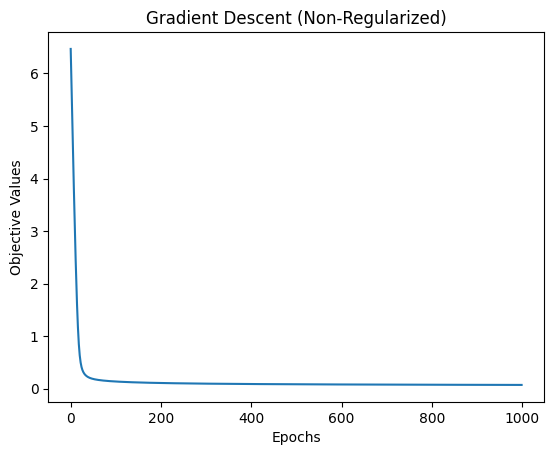

In [24]:
w = np.random.rand(31,1)
w, obj_vals = gradient_descent(x_train, y_train, 0.0, .05, w, 1000)

series= pd.Series(obj_vals)
series.plot()
plt.title('Gradient Descent (Non-Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.show()

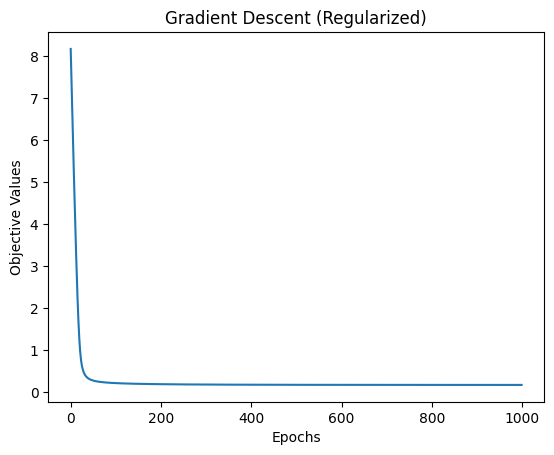

In [25]:
w = np.random.rand(31,1)
w, obj_vals = gradient_descent(x_train, y_train, .05, .05, w, 1000)

series= pd.Series(obj_vals)
series.plot()
plt.title('Gradient Descent (Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.show()

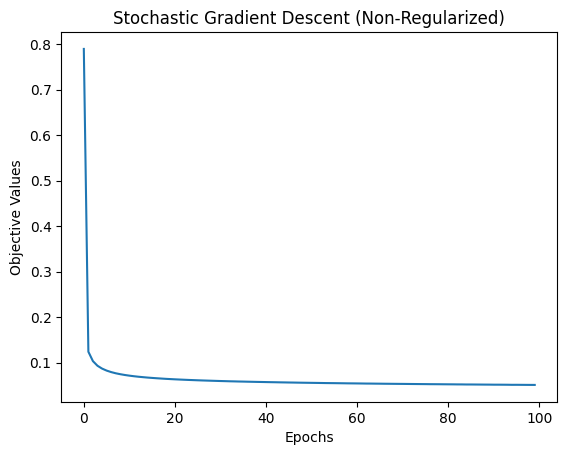

In [26]:
w = np.random.rand(31,)

w, obj_vals = sgd(x_train, y_train, 0, .01, w, 100)
series= pd.Series(obj_vals)
series.plot()
plt.title('Stochastic Gradient Descent (Non-Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.show()

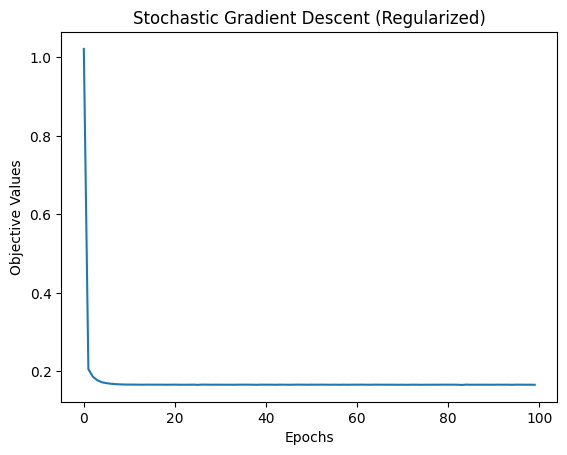

In [52]:
w = np.random.rand(31,)

w, obj_vals = sgd(x_train, y_train, .05, .01, w, 100)
series= pd.Series(obj_vals)
series.plot()
plt.title('Stochastic Gradient Descent (Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.show()

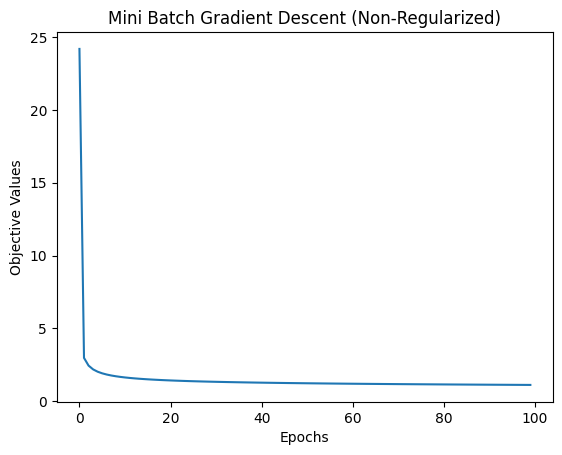

In [28]:
w = np.random.rand(31,)

w, obj_vals = mbgd(x_train, y_train, 0, .01, w, 100)
series= pd.Series(obj_vals)
series.plot()
plt.title('Mini Batch Gradient Descent (Non-Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.show()


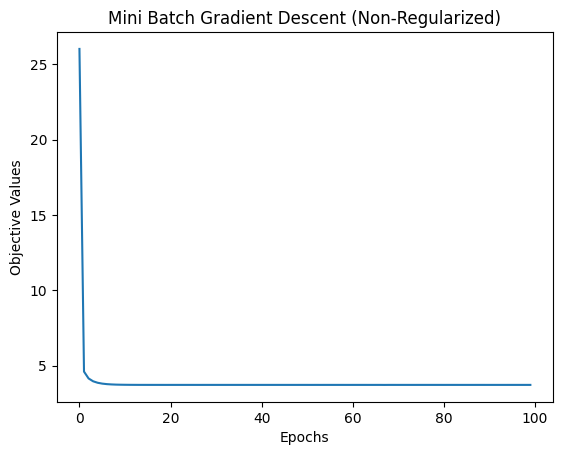

In [29]:
w = np.random.rand(31,)

w, obj_vals = mbgd(x_train, y_train, .05, .01, w, 100)
series= pd.Series(obj_vals)
series.plot()
plt.title('Mini Batch Gradient Descent (Non-Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [62]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    wx = np.dot(X,w)
    y = 1/(1+np.exp(-wx))
    y = np.round(y)
    return np.where(y > 0.5, 1, -1)



    

In [94]:
# evaluate training error of logistic regression and regularized version
from sklearn.metrics import *


In [136]:
w = np.random.rand(31,1)
w, obj_vals = gradient_descent(x_train, y_train, 0.0, .05, w, 1000)
score = accuracy_score(y_train, predict(w, x_train))
print("Gradient Descent Non Regularized Score: ")
print(score)

w_reg = np.random.rand(31,1)
w_reg, obj_vals = gradient_descent(x_train, y_train, .05, .05, w_reg, 1000)
score = accuracy_score(y_train, predict(w_reg, x_train))
print("Gradient Descent Regularized Score: ")
print(score)


Gradient Descent Non regularized Score: 
0.989010989010989
Gradient Descent Regularized Score: 
0.9846153846153847


In [137]:
w_sgd = np.random.rand(31,)
w_sgd, obj_vals = sgd(x_train, y_train, 0, .01, w_sgd, 1000)
score = accuracy_score(y_train, predict(w_sgd, x_train))
print("Stochastic Gradient Descent Non Regularized Score:")
print(score)

w_sgd_reg = np.random.rand(31,)
w_sgd_reg, obj_vals = sgd(x_train, y_train, .05, .01, w_sgd_reg, 1000)
score = accuracy_score(y_train, predict(w_sgd_reg, x_train))
print("Stochastic Gradient Descent Regularized Score:")
print(score)


Stochastic Gradient Descent Non regularized Score:
0.9868131868131869

Stochastic Gradient Descent Regularized Score:
0.9868131868131869


In [139]:
w_mb = np.random.rand(31,)
w_mb, obj_vals = mbgd(x_train, y_train, 0, .01, w_mb, 1000)
score = accuracy_score(y_train, predict(w_mb, x_train))
print("Mini Batch Gradient Descent Non Regularized Score: ")
print(score)

w_mb_reg = np.random.rand(31,)
w_mb_reg, obj_vals = mbgd(x_train, y_train, .05, .01, w_mb_reg, 1000)
score = accuracy_score(y_train, predict(w_mb_reg, x_train))
print("Mini Batch Gradient Descent Regularized Score: ")
print(score)


Mini Batch Gradient Descent Non Regularized Score: 
0.989010989010989
Mini Batch Gradient Descent Regularized Score: 
0.9846153846153847


In [141]:
w = np.random.rand(31,1)
w, obj_vals = gradient_descent(x_train, y_train, 0.0, .05, w, 1000)
score = accuracy_score(y_test, predict(w, x_test))
print("Gradient Descent Non Regularized Score (test): ")
print(score)

w_reg = np.random.rand(31,1)
w_reg, obj_vals = gradient_descent(x_train, y_train, .05, .05, w_reg, 1000)
score = accuracy_score(y_train, predict(w_reg, x_train))
print("Gradient Descent Regularized Score (test): ")
print(score)

Gradient Descent Non Regularized Score (test): 
0.956140350877193
Gradient Descent Regularized Score (test): 
0.9824175824175824


In [143]:
w_sgd = np.random.rand(31,)
w_sgd, obj_vals = sgd(x_train, y_train, 0, .01, w_sgd, 1000)
score = accuracy_score(y_test, predict(w_sgd, x_test))
print("Stochastic Gradient Descent Non Regularized Score (test): ")
print(score)

w_sgd_reg = np.random.rand(31,)
w_sgd_reg, obj_vals = sgd(x_train, y_train, .05, .01, w_sgd_reg, 1000)
score = accuracy_score(y_test, predict(w_sgd_reg, x_test))
print("Stochastic Gradient Descent Regularized Score (test): ")
print(score)


Stochastic Gradient Descent Non Regularized Score (test): 
0.9473684210526315

Stochastic Gradient Descent Regularized Score (test): 
0.9736842105263158


In [145]:
w_mb = np.random.rand(31,)
w_mb, obj_vals = mbgd(x_train, y_train, 0, .01, w_mb, 1000)
score = accuracy_score(y_test, predict(w_mb, x_test))
print("Mini Batch Gradient Descent Non Regularized Score (test): ")
print(score)

w_mb_reg = np.random.rand(31,)
w_mb_reg, obj_vals = mbgd(x_train, y_train, .05, .01, w_mb_reg, 1000)
score = accuracy_score(y_test, predict(w_mb_reg, x_test))
print("Mini Batch Gradient Descent Regularized Score (test): ")
print(score)

Mini Batch Gradient Descent Non Regularized Score (test): 
0.9473684210526315
Mini Batch Gradient Descent Regularized Score (test): 
0.9649122807017544


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

learning rate is .01


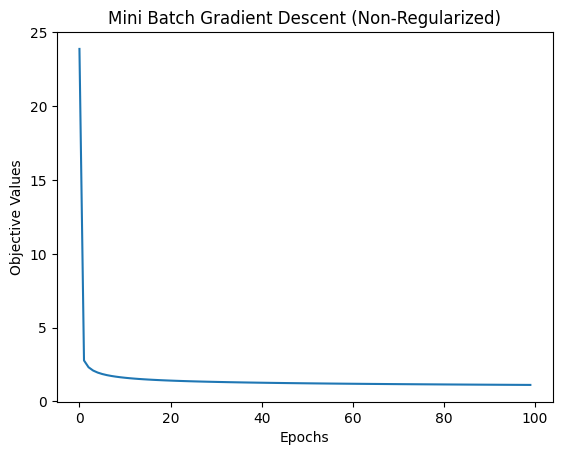

learning rate is .15


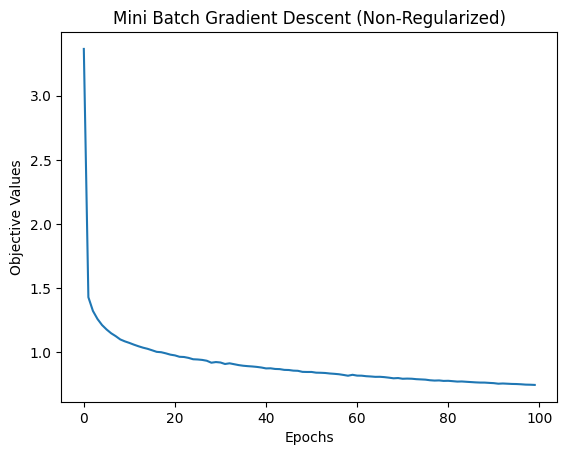

In [148]:
print("learning rate is .01")

w = np.random.rand(31,)

w, obj_vals = mbgd(x_train, y_train, 0, .01, w, 100)
series= pd.Series(obj_vals)
series.plot()
plt.title('Mini Batch Gradient Descent (Non-Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.show()

print("learning rate is .15")

w = np.random.rand(31,)

w, obj_vals = mbgd(x_train, y_train, 0, .15, w, 100)
series= pd.Series(obj_vals)
series.plot()
plt.title('Mini Batch Gradient Descent (Non-Regularized)')
plt.xlabel('Epochs')
plt.ylabel('Objective Values')
plt.show()

print("The lower the learning rate, the more optmized the gradient descent is since it moves towards 0 faster. This means it is finding the local minimum quicker. ")